## Sözlük ve liste

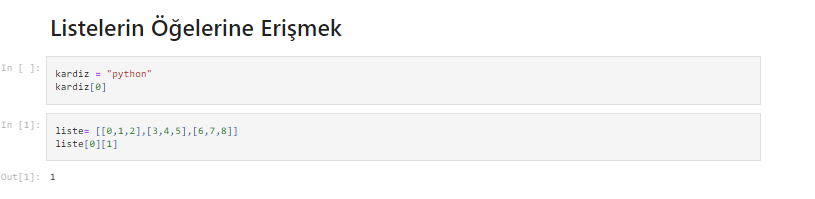

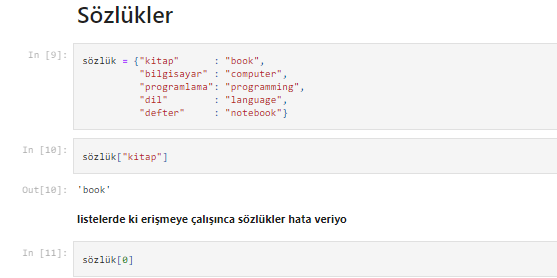

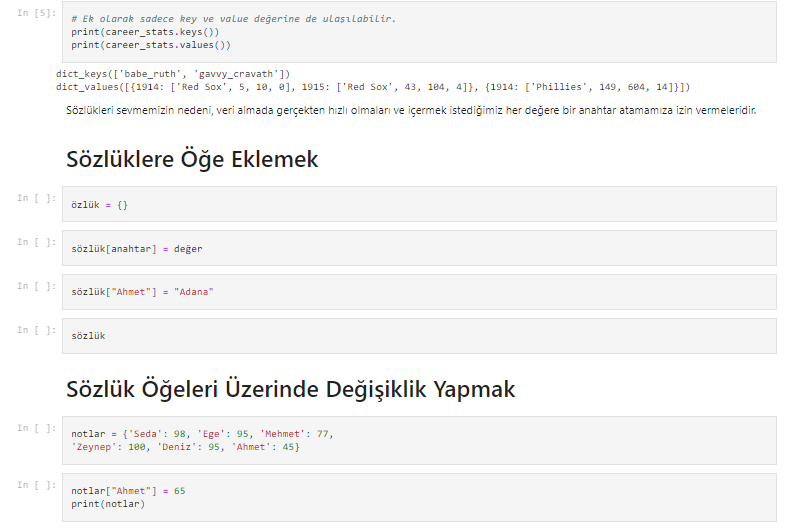

## Fonksiyon ile Veri Setinde işlem Yapma

In [ ]:
def encode_menu_sequence(menu_sequence):
    # Benzersiz menü sınıflarını belirleyin
    unique_menus = ['menu1', 'menu2', 'menu3', 'menu4', 'menu5', 'menu6', 'menu7', 'menu8', 'menu9']
    # Boş bir liste oluşturun
    binary_code = []
    # Her bir benzersiz menü için kontrol yapın
    for menu in unique_menus:
        # Eğer menü sıralamada varsa '1', yoksa '0' ekle
        if menu in menu_sequence:
            binary_code.append('1')
        else:
            binary_code.append('0')
    # Sonuç listesini birleştirerek string olarak döndürün
    return ''.join(binary_code)

# Fonksiyonu test edelim
menu_sequence = 'menu2, menu4, menu5'
encoded_menu = encode_menu_sequence(menu_sequence)

binary_encoded_targets = target_column.apply(encode_menu_sequence)

# Yeni oluşturulan ikili kodları 'target_binary' sütunu olarak DataFrame'e ekleyin
df_train['target_binary'] = binary_encoded_targets

## Başka örnek bir hackerrank sorusu

Verilen bir 2D matris (grid) içinde, herhangi bir hücrenin etrafında en büyük sayı olma özelliğine sahip olduğu hücrelerin sayısını bulan bir fonksiyon yazınız. Bir hücrenin etrafındaki hücreler (komşuları) yalnızca doğrudan sağında, solunda, üstünde ve altında olan hücrelerdir (köşegenler dahil değil).

Fonksiyon İmzası: def numCells(grid: List[List[int]]) -> int

Örnekler: numCells([[8, 5, 3], [4, 5, 6], [7, 8, 9]]) => 2 numCells([[1, 2, 3], [4, 5, 6], [7, 8, 9]]) => 1 numCells([[1, 4, 4], [4, 5, 6], [7, 8, 9]]) => 3 Açıklamalar:

İlk örnekte, sadece 8 ve 9'un etrafındaki hücrelerden daha büyük olduğu için 2 hücre en büyük sayı olma özelliğine sahiptir. İkinci örnekte, sadece 9'un etrafındaki hücrelerden daha büyük olduğu için sadece bir hücre en büyük sayı olma özelliğine sahiptir. Üçüncü örnekte, 5, 6 ve 9'un etrafındaki hücrelerden daha büyük olduğu için bu üç hücre en büyük sayı olma özelliğine sahiptir.

In [ ]:
def numCells(grid):
    # Write your code here
    res = 0
    for i in range(len(grid)):
        for k in range (len(grid[0])):
            val = grid[i][k]
            flag = 1
            for ii in range (max(0,i-1),min(len(grid),i+2)):
                for kk in range(max(0,k-1),min(len(grid[0]),k+2)):
                    if (ii,kk)!=(i,k) and val<= grid[ii][kk] :
                         flag=0
                        break 
                if flag == 0:
                     break
            else:
                res+=1
    return res
res = [[8, 5, 3], [4, 5, 6], [7, 8, 9]]

print(numCells(res))

Şöyle çalışıyor sözlükte data['A'] nın değerlerinden data['A']'nın isnul olanlarının indexine gidiyor

In [2]:
import pandas as pd

# Örnek bir veri çerçevesi oluşturalım
data = pd.DataFrame({
    'A': [1, 2, None, 4, None],
    'B': ['x', 'y', None, 'z', 'w']
})

# Eksik değerlere sahip satırların indekslerini bulma
index_nan_A = list(data['A'][data['A'].isnull()].index)
index_nan_B = list(data['B'][data['B'].isnull()].index)

print("A sütunu eksik değerlerinin indeksleri:", index_nan_A)
print("B sütunu eksik değerlerinin indeksleri:", index_nan_B)


A sütunu eksik değerlerinin indeksleri: [2, 4]
B sütunu eksik değerlerinin indeksleri: [2]


In [8]:
data['A'][2]

nan

In [ ]:
import pandas as pd

# Basit bir veri çerçevesi oluşturalım
data = pd.DataFrame({
    'Customer_ID': [1, 1, 2, 2, 3, 3],
    'Age': [25, 30, 20, None, 35, None]
})

# Örnek bir fonksiyon oluşturalım
def fill_na_with_median(data, val):
    for i in range(len(data)):
        if pd.isnull(data[val].iloc[i]):  # Eğer değer eksikse
            current_customer_id = data.iloc[i]["Customer_ID"]  # Satırdaki Customer_ID değeri
            val_pred = data[val][data["Customer_ID"] == current_customer_id].median()  # Medyan hesaplama
            if not pd.isnull(val_pred):  # Eğer medyan değeri NaN değilse
                data[val].iloc[i] = val_pred  # Eksik değeri medyan ile doldur
    return data

# 'Age' sütunundaki eksik değerleri dolduralım
data = fill_na_with_median(data, 'Age')
print(data)
